# Diplomatura de Especialización en Desarrollo de Aplicaciones con Inteligencia Artificial - Inteligencia Artificial para Juegos (Game AI) - Sesión 5 (Desafío)

PhD. Edwin Villanueva, Eng. Daniel Saromo

## Implementando un modelo para clasificar flores Iris

En este notebook se describe el desarrollo de un proyecto basico de Machine Learning para generar clasificadores de flores del tipo Iris

In [1]:
from IPython.display import Image
Image(url= "https://miro.medium.com/max/300/1*UitAg_SOJXrG4SpxKi_dSg.png")

El conjunto de datos para trabajar el proyecto es Iris Dataset de UCI (https://archive.ics.uci.edu/ml/datasets/Iris). Contiene 3 clases de 50 instancias cada una, donde cada clase se refiere a un tipo de planta de iris (Setosa, virginica, Versicolour). Cada instancia es descrita por 4 atributos numericos:

- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm

## Verificar que se tenga todo el software de ML instalado

In [2]:
# version de Python
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
# keras
import keras
print('keras: {}'.format(keras.__version__))

import pickle


Python: 3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
scipy: 1.4.1
numpy: 1.19.5
matplotlib: 3.2.2
pandas: 1.1.5
sklearn: 0.22.2.post1
keras: 2.4.3


## Paso 1: Cargar e inspeccionar los datos

### 1.1) Primero hay que importar todas las librerias y modulos que se usará

In [3]:
# Librerias base que se usaran
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split    # para validacion y selecion de modelos 
from sklearn.model_selection import cross_val_score     # para validacion y selecion de modelos 
from sklearn.model_selection import KFold               # para generar k-folds para validacion y selecion de modelos  
from sklearn.preprocessing import LabelEncoder          # para reetiquetar labels con valores numericos
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score  # para manejar metricas de desempeño 
from sklearn.metrics import confusion_matrix  # para manejar matrices de confusion
from sklearn.metrics import classification_report  # para hacer reportes de resultados de clasificacion

# Librerias de diferentes Modelos de ML
from keras.models import Sequential   # Para crear holders de Redes neuronales
from keras.layers import Dense        # Para crear capas de Redes neuronales  fully-connected
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.linear_model import LogisticRegression # para usar modelos de regresion logistica  
from sklearn.tree import DecisionTreeClassifier     # para usar modelos de tipo arboles de decision
from sklearn.neighbors import KNeighborsClassifier  # para modelos  Knn 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # para modelos discriminantes lineales
from sklearn.naive_bayes import GaussianNB   # para modelos Naive Bayes
from sklearn.svm import SVC   # para modelos SVM

### 1.2) Cargar el dataset

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

In [5]:
import pandas as pd

In [6]:
# Cargar dataset Iris
#url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
#names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
#dataset = pandas.read_csv(url, names=names)
#------------------------------------------------------------------------------#
names = ['posx_g1_fromPacman', 'posy_g1_fromPacman',
'posx_g2_fromPacman','posy_g2_fromPacman',
'capsulas_restantes','manhattan_dist_toClosest_ghost',
'manhattan_dist_toClosest_caps',
'mean_manhDist_5_closests_dots',
'score','cant_scared_ghosts','action']

dataset = pandas.read_csv("datosRecolectadosTotal.csv", names=names)

### 1.3) Inspeccionar los datos 

In [7]:
# ojear los 20 primeros registros 
print(dataset.head(20))

    posx_g1_fromPacman  posy_g1_fromPacman  ...  cant_scared_ghosts  action
0                 -1.0                 4.0  ...                 0.0     0.0
1                 -1.0                 4.0  ...                 0.0     0.0
2                 -1.0                 4.0  ...                 0.0     0.0
3                  0.0                 4.0  ...                 0.0     0.0
4                  0.0                 4.0  ...                 0.0     0.0
5                  0.0                 4.0  ...                 0.0     0.0
6                  0.0                 5.0  ...                 0.0     0.0
7                  0.0                 5.0  ...                 0.0     0.0
8                  0.0                 5.0  ...                 0.0     0.0
9                  0.0                 6.0  ...                 0.0     0.0
10                 0.0                 6.0  ...                 0.0     0.0
11                 0.0                 6.0  ...                 0.0     0.0
12          

In [8]:
# descripcion estadistica
print(dataset.describe())

       posx_g1_fromPacman  posy_g1_fromPacman  ...  cant_scared_ghosts        action
count        29629.000000        29629.000000  ...        29629.000000  29629.000000
mean            -0.438422            0.475784  ...            0.663640      2.140504
std              7.842071            3.811598  ...            0.882297      1.274498
min            -17.000000           -8.000000  ...            0.000000      0.000000
25%             -6.000000           -2.000000  ...            0.000000      1.000000
50%              0.000000            0.000000  ...            0.000000      2.000000
75%              6.000000            4.000000  ...            2.000000      3.000000
max             17.000000            8.000000  ...            2.000000      4.000000

[8 rows x 11 columns]


In [9]:
# distribucion de clases
print(dataset.groupby('action').size())

action
0.0    3177
1.0    7533
2.0    6079
3.0    7630
4.0    5210
dtype: int64


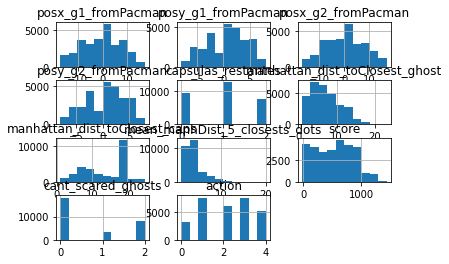

In [10]:
# histogramas
dataset.hist()
plt.show()

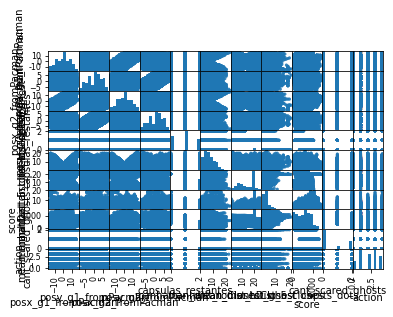

In [11]:
# Matriz scatter plot para ver correlaciones entre atributos
scatter_matrix(dataset)
plt.show()

## Paso 2: Pre-procesar datos y crear modelos

### 2.1) Separa features y etiquetas y codifica etiquetas con numeros 

In [12]:
dataset.shape

(29629, 11)

In [13]:
# separa features y labels en 2 variables
array = dataset.values
#X = array[:,0:4]   # features
X = array[:,0:10]
Y = array[:,10]     # labels

# codifica etiquetas de clase como enteros
encoder = LabelEncoder()
encoder.fit(Y)
Yt = encoder.transform(Y)

In [14]:
Yt.shape

(29629,)

In [19]:
numpy.unique(Yt)

array([0, 1, 2, 3, 4])

### 2.2) Separar conjunto de entrenamiento y prueba

In [20]:
# Parte los datos en conjuntos de entrenamiento/prueba
test_size = 0.20
seed = 7   # semilla para la generacion de numeros aleatorios para la particion de los datos(para replicabilidad)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')

Con ello, en X_train y Y_train esta la data para entrenar modelos. En X_test y Y_test esta la data que se usará para ver la capacidad predictiva de los modelos creados

### 2.3) Entrenar y evaluar modelos

No sabemos qué algoritmos de ML generarán buenos predictores para este problema o qué configuraciones usar. Vamos a evaluar 2 algoritmos de ML diferentes:

- Feed Fordward Neural Network (NN)
- Classification and Regression Trees (CART)

In [21]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
# One hot encoding
enc = OneHotEncoder()
Ytrain_dummy = enc.fit_transform(Y_train[:, np.newaxis]).toarray()

In [22]:
# define la funcion constructora de la arquitectura de la red neuronal
def define_nn_model():
    # crea modelo, 
    model = Sequential()  # Informa que las capas que se van agregar son secuenciales
    #model.add(Dense(8, input_dim=4, activation='relu'))
    model.add(Dense(8, input_dim=10, activation='relu'))
    #model.add(Dense(3, activation='softmax'))
    model.add(Dense(5, activation='softmax'))
    # Compila el model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [23]:
# Definimos el pool de algoritmos de ML a evaluar
models = []
models.append( ('CART', DecisionTreeClassifier()) )  # DT
models.append( ('SVC', SVC()) )   # SVC
models.append( ('NN', KerasClassifier(build_fn=define_nn_model, epochs=50, batch_size=5, verbose=False)) )   # NN 

La evaluacion de cada algoritmo se realiza con el mismo particionamiento de datos para asegurar una comparación justa. Para ello se resetea el generador de numeros aleatorios antes de cada evaluacion La evaluacion de los algoritmos se realiza en una estrategia en crossvalidacion con 10 folds: se parte los datos de entrenamiento en 10 partes (folds) e iterativamente se evalua cada fold como datos de prueba con el modelo entrenado en el resto de folds. La metrica de evaluacion es 'accuracy', esta es el ratio del número de instancias correctamente clasificadas dividido por el número total de instancias en el conjunto de datos del fold.

In [24]:
# Evaluamos cada algoritmo de ML en estrategia de crossvalidacion de 10-folds (10-fold-CV)
results = []
names = []
seed = 7   # semilla para generar los mismos folds para cada algoritmo 
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)  # especifica el particionador de datos a 10-fold-CV
    if name == 'NN':
        cv_results = cross_val_score(model, X_train, Ytrain_dummy, cv=kfold)
    else:
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

CART: 0.958233 (0.004640)
SVC: 0.286335 (0.005166)


KeyboardInterrupt: ignored

### 2.4) Seleccionar  modelo y reentrenar

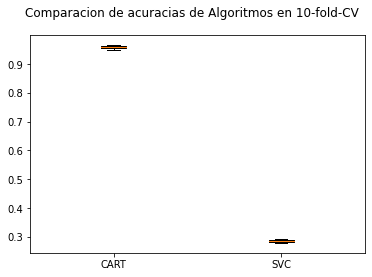

In [25]:
# Muestra graficamente la comparacion de resultados de accuracia en crossvalidacion de los Algoritmos
fig = plt.figure()
fig.suptitle('Comparacion de acuracias de Algoritmos en 10-fold-CV')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### NOTA DE ESTUDIANTE

Se decidirá utilizar el modelo "CART" (DecisionTreeClassifier) dada la enorme diferencia en el CV-SCORE encontrado entre este y el resto de los modelos.

In [26]:
# Reentrena modelo DT con todos los datos de entrenamiento y lo prueba en el conjunto de validación
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### 2.5) Probar modelo en datos de prueba

In [27]:
Y_test_pred = model.predict(X_test)
print("Accuracy score:", accuracy_score(Y_test, Y_test_pred))
print(confusion_matrix(Y_test, Y_test_pred))
print(classification_report(Y_test, Y_test_pred))

Accuracy score: 0.9770502868714142
[[ 622   10    6    2    0]
 [  14 1488   10    6    6]
 [   0    6 1187    6   12]
 [   3    9   10 1451    7]
 [   4   13    6    6 1042]]
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       640
         1.0       0.98      0.98      0.98      1524
         2.0       0.97      0.98      0.98      1211
         3.0       0.99      0.98      0.98      1480
         4.0       0.98      0.97      0.97      1071

    accuracy                           0.98      5926
   macro avg       0.98      0.98      0.98      5926
weighted avg       0.98      0.98      0.98      5926



In [28]:
print (Y_test)
print (Y_test_pred)

[1. 4. 2. ... 2. 1. 2.]
[1. 4. 2. ... 2. 1. 2.]


In [ ]:
#Las siguientes celdas se podrán ejecutar una vez modificado el código para poder recibir al archivo `datosRecolectadosTotal.csv` y esté preparado para inferir una acción para el entorno Pacman.

### 2.6) Simulando funcionamiento en entorno de juego (solo una salida)

In [29]:
X_test[0].shape

(10,)

In [30]:
print(model.predict(X_test[12].reshape(1,-1)))
print(Y_test[12])

[4.]
4.0


In [31]:
probas = (model.predict_proba(X_test[12].reshape(1,-1)))

In [32]:
probas*1000

array([[   0.,    0.,    0.,    0., 1000.]])

### 2.7) Grabando el modelo en un archivo externo

In [33]:
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [34]:
# open a file, where you ant to store the data
archivoModelo = open('modeloEntrenado.p', 'wb')

# dump information to that file
pickle.dump(model, archivoModelo)

archivoModelo.close()